# Missing value imputation: MeanMedianImputer

The MeanMedianImputer() replaces missing data by the mean or median value of the variable. It works only with numerical variables.
**For this demonstration, we use the [Ames House Prices dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) produced by Professor Dean De Cock:**

## Version

In [1]:
# Make sure you are using this 
# Feature-engine version.

import feature_engine

feature_engine.__version__

'1.6.2'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from  feature_engine.imputation import MeanMedianImputer

## Load data

In [4]:
# Read the separate files
train_df = pd.read_csv('../data/house-prices/train.csv')
test_df = pd.read_csv('../data/house-prices/test.csv')

# Separate features and target in training data
X_train = train_df.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df['SalePrice']

# For test data, you might not have the target variable
X_test = test_df.drop(['Id'], axis=1)  # Note: test data might not have SalePrice column

print("X_train :", X_train.shape)
print("X_test :", X_test.shape)

X_train : (1460, 79)
X_test : (1459, 79)


## Check missing data

In [5]:
# Numerical variables with missing data

X_train[['LotFrontage', 'MasVnrArea']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
dtype: float64

## Imputation with the median

Let's start by imputing missing data in 2 variables with their median.

In [6]:
# Set up the imputer.

imputer = MeanMedianImputer(
    imputation_method='median',
    variables=['LotFrontage', 'MasVnrArea'],
)

In [7]:
# Find median values

imputer.fit(X_train)

MeanMedianImputer(variables=['LotFrontage', 'MasVnrArea'])

In [8]:
# Dictionary with the imputation values for each variable.

imputer.imputer_dict_

{'LotFrontage': 69.0, 'MasVnrArea': 0.0}

In [9]:
# Let's corroborate that the dictionary 
# contains the median values of the variables.

X_train[['LotFrontage', 'MasVnrArea']].median()

LotFrontage    69.0
MasVnrArea      0.0
dtype: float64

In [10]:
# impute the data

train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

In [11]:
# Check we no longer have NA

train_t[['LotFrontage', 'MasVnrArea']].isnull().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

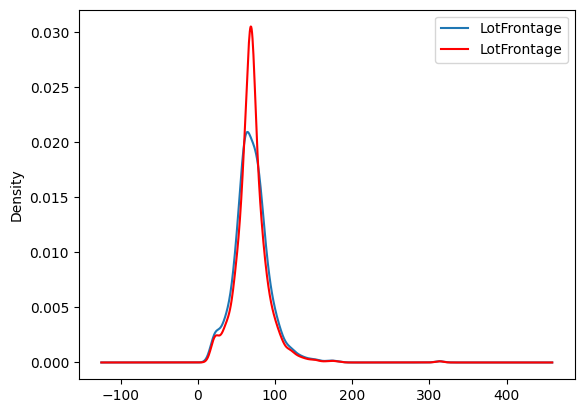

In [12]:
# The variable distribution changed slightly with
# more values accumulating towards the median 
# after the imputation.

fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde', ax=ax)
train_t['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Automatically select all numerical variables

Let's now impute all numerical variables with the mean.

If we leave the parameter `variables` to `None`, the transformer identifies and imputes all numerical variables.

In [13]:
# Set up the imputer

imputer = MeanMedianImputer(
    imputation_method='mean',
)

In [14]:
# Find numerical variables and their mean.

imputer.fit(X_train)

MeanMedianImputer(imputation_method='mean')

In [15]:
# Numerical variables identified.

imputer.variables_

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [16]:
# The imputation value, the mean, for each variable

imputer.imputer_dict_

{'MSSubClass': 56.897260273972606,
 'LotFrontage': 70.04995836802665,
 'LotArea': 10516.828082191782,
 'OverallQual': 6.0993150684931505,
 'OverallCond': 5.575342465753424,
 'YearBuilt': 1971.267808219178,
 'YearRemodAdd': 1984.8657534246574,
 'MasVnrArea': 103.68526170798899,
 'BsmtFinSF1': 443.6397260273973,
 'BsmtFinSF2': 46.54931506849315,
 'BsmtUnfSF': 567.2404109589041,
 'TotalBsmtSF': 1057.4294520547944,
 '1stFlrSF': 1162.626712328767,
 '2ndFlrSF': 346.99246575342465,
 'LowQualFinSF': 5.844520547945206,
 'GrLivArea': 1515.463698630137,
 'BsmtFullBath': 0.42534246575342466,
 'BsmtHalfBath': 0.057534246575342465,
 'FullBath': 1.5650684931506849,
 'HalfBath': 0.38287671232876713,
 'BedroomAbvGr': 2.8664383561643834,
 'KitchenAbvGr': 1.0465753424657533,
 'TotRmsAbvGrd': 6.517808219178082,
 'Fireplaces': 0.613013698630137,
 'GarageYrBlt': 1978.5061638868744,
 'GarageCars': 1.7671232876712328,
 'GarageArea': 472.9801369863014,
 'WoodDeckSF': 94.2445205479452,
 'OpenPorchSF': 46.660273

In [17]:
# impute the data

train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

# the numerical variables do not have NA after
# the imputation.

test_t[imputer.variables_].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64